# Sumo Wrestling Match Prediction

## Data Modeling Using PyCaret - using existing numeric data (4/5)

## Contents: 
- [Install PyCaret](#Install-PyCaret)
- [Setup](#Setup)
- [Compare Models](#Compare-models)
- [Analyze Model](#Analyze-model)
- [Predictions](#Predictions)
- [Save the model](#Save-the-model)
- [Evaluation](#Evaluation)

We use PyCaret, an open-source machine learning library in Python that automates machine learning workflows with minimal coding required. PyCaret allowed us to spend less time coding and more time analyzing data, by automating many of the repetitive tasks involved in the modeling process. Using PyCaret, we developed and tested a variety of different models.

We started by developing classification models using the existing numeric data to see how they performed before any feature engineering was done. Once we had a benchmark, we developed models incorporating new features created as part of our feature engineering process. This allowed us to see how these new features impacted the performance of our models, and whether they improved the ability to predict the outcome of matches.

### Install PyCaret

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requi

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pycaret

In [3]:
pycaret.__version__

'3.0.0'

### Setup

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#!ls "/content/drive/MyDrive/Colab Notebooks/DS123/capstone/"


In [11]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS123/capstone/sumo_v2_clean.csv")
df.head()

,basho,day,r1_id,r1_rank,r1_shikona,r1_result,r1_win,kimarite,r2_id,r2_rank,...,r1_prev_w,r1_prev_l,r2_heya,r2_shusshin,r2_birth_date,r2_height,r2_weight,r2_prev,r2_prev_w,r2_prev_l
0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,...,4.0,3.0,Kokonoe,Tokyo,1958-08-26,193.5,145.0,Ms4w,4.0,3.0
1,1983.01,3,1337,J12w,Tochitsukasa,1-2 (9-6),0,yorikiri,4306,Ms1e,...,5.0,2.0,Kokonoe,Tokyo,1958-08-26,193.5,145.0,Ms4w,4.0,3.0
2,1983.01,15,4097,J12e,Tamakiyama,8-7,1,yorikiri,4306,Ms1e,...,5.0,2.0,Kokonoe,Tokyo,1958-08-26,193.5,145.0,Ms4w,4.0,3.0
3,1983.01,2,4140,J13w,Chikubayama,1-1 (7-8),1,oshidashi,4125,J7e,...,4.0,3.0,Isegahama,Yamagata,1950-01-02,188.0,134.0,M14w,3.0,12.0
4,1983.01,8,1337,J12w,Tochitsukasa,4-4 (9-6),1,oshidashi,4125,J7e,...,5.0,2.0,Isegahama,Yamagata,1950-01-02,188.0,134.0,M14w,3.0,12.0


In [13]:
from pycaret.classification import * 

In [14]:
sel_cols = df.select_dtypes(exclude='object').columns
df = df[sel_cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226588 entries, 0 to 226587
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   basho      226588 non-null  float64
 1   day        226588 non-null  int64  
 2   r1_id      226588 non-null  int64  
 3   r1_win     226588 non-null  int64  
 4   r2_id      226588 non-null  int64  
 5   r1_height  226588 non-null  float64
 6   r1_weight  226588 non-null  float64
 7   r1_prev_w  226588 non-null  float64
 8   r1_prev_l  226588 non-null  float64
 9   r2_height  226588 non-null  float64
 10  r2_weight  226588 non-null  float64
 11  r2_prev_w  226588 non-null  float64
 12  r2_prev_l  226588 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 22.5 MB


In [16]:
preprocess = setup(data = df, target = 'r1_win', train_size = 0.8, session_id=123)

,Description,Value
0,Session id,123
1,Target,r1_win
2,Target type,Binary
3,Original data shape,"(226588, 13)"
4,Transformed data shape,"(226588, 13)"
5,Transformed train set shape,"(181270, 13)"
6,Transformed test set shape,"(45318, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


### Compare Models

In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5713,0.6090,0.5757,0.5707,0.5732,0.1427,0.1427,17.4200
lightgbm,Light Gradient Boosting Machine,0.5678,0.6045,0.5758,0.5667,0.5712,0.1356,0.1356,2.3570
gbc,Gradient Boosting Classifier,0.5570,0.5877,0.5635,0.5563,0.5598,0.1140,0.1140,22.8280
rf,Random Forest Classifier,0.5519,0.5788,0.5373,0.5534,0.5452,0.1037,0.1038,42.4100
ada,Ada Boost Classifier,0.5478,0.5742,0.5468,0.5479,0.5473,0.0955,0.0955,5.8420
knn,K Neighbors Classifier,0.5441,0.5621,0.5437,0.5441,0.5439,0.0881,0.0881,1.8620
et,Extra Trees Classifier,0.5400,0.5627,0.5264,0.5411,0.5337,0.0800,0.0800,30.2730
qda,Quadratic Discriminant Analysis,0.5334,0.5540,0.5438,0.5327,0.5381,0.0667,0.0667,0.3640
nb,Naive Bayes,0.5315,0.5520,0.5362,0.5312,0.5337,0.0630,0.0630,0.1740
dt,Decision Tree Classifier,0.5237,0.5237,0.5259,0.5235,0.5247,0.0473,0.0473,1.9230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


### Analyze Model

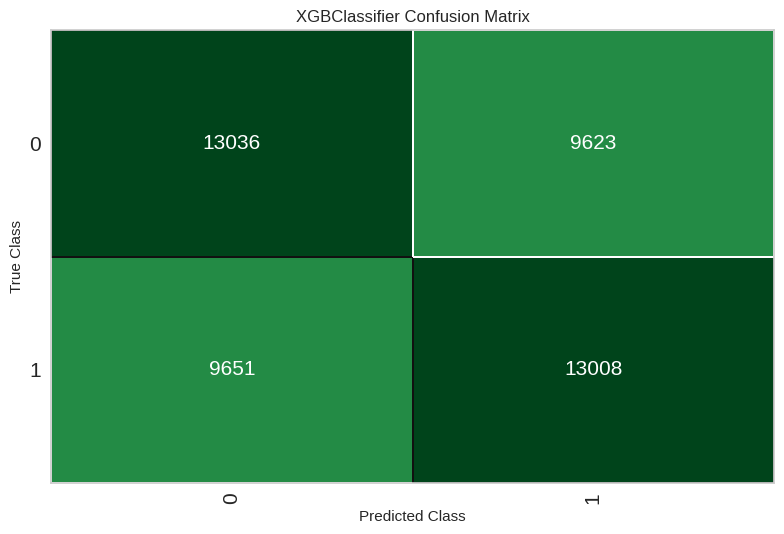

In [27]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

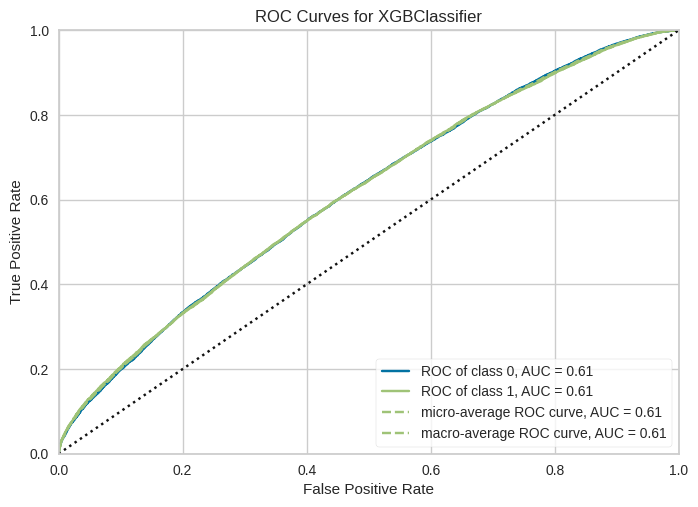

In [26]:
# plot AUC
plot_model(best, plot = 'auc')

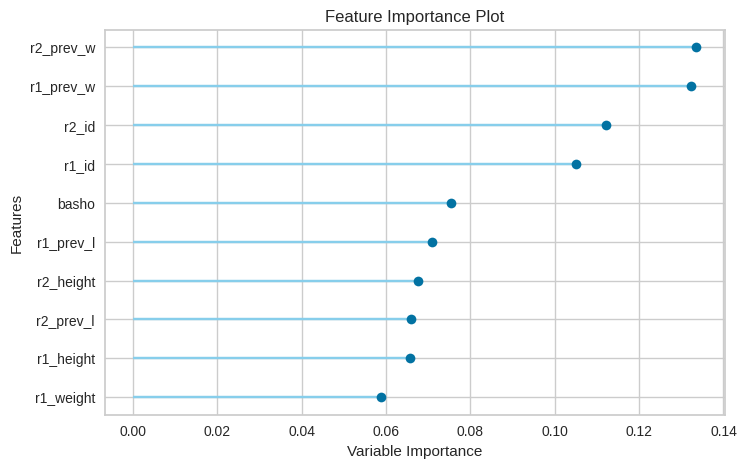

In [25]:
# plot feature importance
plot_model(best, plot = 'feature')

In [29]:
#evaluate_model(best)

### Predictions

In [34]:
# Predict on test set
pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.5747,0.6133,0.5741,0.5748,0.5744,0.1494,0.1494


In [35]:
# show predictions df
pred.head()

,basho,day,r1_id,r2_id,r1_height,r1_weight,r1_prev_w,r1_prev_l,r2_height,r2_weight,r2_prev_w,r2_prev_l,r1_win,prediction_label,prediction_score
83276,1997.069946,4,57,25,189.000000,191.0,7.0,8.0,178.000000,127.0,6.0,9.0,0,1,0.5096
121299,2004.050049,12,287,222,176.000000,140.0,8.0,7.0,177.000000,145.0,8.0,7.0,1,0,0.5032
16837,1986.010010,5,1362,4139,188.399994,131.0,6.0,9.0,174.000000,120.0,7.0,8.0,1,1,0.5252
174229,2013.030029,15,6770,6010,184.000000,186.0,8.0,7.0,182.000000,182.0,4.0,11.0,0,0,0.5653
92616,1999.030029,6,145,43,182.500000,121.5,9.0,6.0,183.600006,149.5,4.0,11.0,1,0,0.5456


### Save the model

In [36]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['basho', 'day', 'r1_id', 'r2_id',
                                              'r1_height', 'r1_weight',
                                              'r1_prev_w', 'r1_prev_l',
                                              'r2_height', 'r2_weight',
                                              'r2_prev_w', 'r2_prev_l'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing...
                                grow_policy=None, importance_type=None,
                

### Evaluation

Here are the scores and metrics for models using existing numeric data only: 

| Model | Description | Accuracy | AUC    | Recall | Prec.  | F1     | Kappa  | MCC    | TT (Sec) |
|--|--|--|--|--|--|--|--|--|--|
| xgboost | Extreme Gradient Boosting | 0.5713 | 0.6090 | 0.5757 | 0.5707 | 0.5732 | 0.1427 | 0.1427 | 17.4200 |
| lightgbm | Light Gradient Boosting Machine | 0.5678 | 0.6045 | 0.5758 | 0.5667 | 0.5712 | 0.1356 | 0.1356 | 2.3570 |
| gbc | Gradient Boosting Classifier | 0.5570 | 0.5877 | 0.5635 | 0.5563 | 0.5598 | 0.1140 | 0.1140 | 22.8280 |
| rf | Random Forest Classifier | 0.5519 | 0.5788 | 0.5373 | 0.5534 | 0.5452 | 0.1037 | 0.1038 | 42.4100 |
| ada | Ada Boost Classifier | 0.5478 | 0.5742 | 0.5468 | 0.5479 | 0.5473 | 0.0955 | 0.0955 | 5.8420 |
| knn | K Neighbors Classifier | 0.5441 | 0.5621 | 0.5437 | 0.5441 | 0.5439 | 0.0881 | 0.0881 | 1.8620 |
| et | Extra Trees Classifier | 0.5400 | 0.5627 | 0.5264 | 0.5411 | 0.5337 | 0.0800 | 0.0800 | 30.2730 |
| qda | Quadratic Discriminant Analysis | 0.5334 | 0.5540 | 0.5438 | 0.5327 | 0.5381 | 0.0667 | 0.0667 | 0.3640 |
| nb | Naive Bayes | 0.5315 | 0.5520 | 0.5362 | 0.5312 | 0.5337 | 0.0630 | 0.0630 | 0.1740 |
| dt | Decision Tree Classifier | 0.5237 | 0.5237 | 0.5259 | 0.5235 | 0.5247 | 0.0473 | 0.0473 | 1.9230 |
| ridge | Ridge Classifier | 0.5227 | 0.0000 | 0.5230 | 0.5227 | 0.5228 | 0.0454 | 0.0454 | 0.1860 |
| lda | Linear Discriminant Analysis | 0.5227 | 0.5348 | 0.5230 | 0.5227 | 0.5228 | 0.0454 | 0.0454 | 0.4890 |
| lr | Logistic Regression | 0.5220 | 0.5341 | 0.5217 | 0.5220 | 0.5218 | 0.0439 | 0.0439 | 1.5560 |
| svm | SVM - Linear Kernel | 0.5018 | 0.0000 | 0.4077 | 0.5550 | 0.3954 | 0.0036 | 0.0056 | 8.76540 | 
| dummy | Dummy Classifier | 0.5000 | 0.5000 | 0.5000 | 0.2500 | 0.3333 | 0.0000 | 0.0000 | 0.1320 | 

The above table shows the evaluation metrics for various models that use existing numeric data only. The models are evaluated using acuracy, AUC, recall, precision, F1-score, Kappa, Matthews correlation coefficient (MCC) and training time (TT).

While the baseline for model performance was 0.5, all models using the existing numeric data have an accuracy above the baseline. However, the highest accuracy achieved by Extreme Gradient Boosting was only 0.5713, indicating that the performance of all models performed only slightly better than random guessing.

In next notebook (05-data-modeling-PyCaret_v2), we will develop models incorporating new features to see if they would improve model performance.

In [37]:
# Reference: https://pycaret.gitbook.io/docs/get-started/quickstart